In [12]:
from glob import glob
import pandas as pd
from ast import literal_eval
from tqdm.notebook import tqdm
tqdm.pandas()

label = "Cardiomegaly"
in_domain = "MIMIC"

df = pd.read_csv("1_baseline_EVAL-wandb_export_2022-11-22T17_52_23.068-05_00.csv")
# df = df.query("binary_label == @label")
# df = df.query("train_envs == 'MIMIC'")
df

,Name,train_env_0,train_env_1,binary_label,seed,es_f1,ID,job_id,State,Job Type,...,test.PAD_acc,test.MIMIC_prec_bin,test.MIMIC_rec_bin,test.CXP_prec_bin,test.CXP_rec_bin,test.NIH_prec_bin,test.NIH_rec_bin,test.PAD_prec_bin,test.PAD_rec_bin,es_opt_thresh
0,"(CXP,)-test(MIMIC)-shift(None)-bal(None,None)",CXP,NaN,Pneumothorax,0,0.714091,c2ub14qr,27039924,finished,1_baseline,...,0.993154,0.364995,0.353306,0.518785,0.485522,0.329213,0.457098,0.306122,0.306122,0.29
1,"(CXP,NIH)-test(MIMIC)-shift(None)-bal(None,None)",CXP,NIH,Pneumothorax,0,0.719801,8dr2o2tb,27039926,finished,1_baseline,...,0.994765,0.379154,0.259298,0.500491,0.527404,0.457082,0.332293,0.428571,0.183673,0.33
2,"(CXP,PAD)-test(MIMIC)-shift(None)-bal(None,None)",CXP,PAD,Pneumothorax,0,0.727782,qvmz92ez,27039921,finished,1_baseline,...,0.994362,0.363122,0.331612,0.496194,0.539297,0.332740,0.291732,0.393939,0.265306,0.17
3,"(MIMIC,)-test(MIMIC)-shift(None)-bal(None,None)",MIMIC,NaN,Pneumothorax,0,0.699785,k2nenx8j,27039933,finished,1_baseline,...,0.994060,0.335703,0.439050,0.332840,0.581179,0.346687,0.351014,0.250000,0.102041,0.15
4,"(MIMIC,CXP)-test(MIMIC)-shift(None)-bal(None,N...",MIMIC,CXP,Pneumothorax,0,0.728350,xcos9u5l,27039925,finished,1_baseline,...,0.992550,0.395455,0.449380,0.481245,0.583764,0.383769,0.435257,0.295082,0.367347,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,"(MIMIC,NIH)-test(MIMIC)-shift(None)-bal(None,N...",MIMIC,NIH,All,0,0.782981,79zle1pd,27032544,finished,1_baseline,...,0.834994,0.747722,0.860343,0.808696,0.918881,0.582698,0.660704,0.696129,0.519845,0.42
86,"(MIMIC,PAD)-test(MIMIC)-shift(None)-bal(None,N...",MIMIC,PAD,All,0,0.797440,6k6vvrol,27032541,finished,1_baseline,...,0.849391,0.747550,0.866619,0.809577,0.907282,0.508246,0.753429,0.662451,0.723037,0.41
87,"(NIH,)-test(MIMIC)-shift(None)-bal(None,None)",NIH,NaN,All,0,0.732541,xfbh7izc,27032534,finished,1_baseline,...,0.824021,0.731447,0.807277,0.811347,0.855601,0.538858,0.748360,0.649215,0.534944,0.22
88,"(NIH,PAD)-test(MIMIC)-shift(None)-bal(None,None)",NIH,PAD,All,0,0.756103,qdvkvcia,27032543,finished,1_baseline,...,0.842948,0.708218,0.835875,0.820862,0.827852,0.539066,0.757007,0.644436,0.729508,0.25


# 1 - Parse Embeddings from CSV

In [32]:
row_idx = 2
row = df.iloc[row_idx]

In [33]:
def load_all_dfs(row):
    dfs = []
    for csv_file in glob(f"{row.output_dir}/emb-test-*.csv"):
        tmp_df = pd.read_csv(csv_file)
        dfs.append(tmp_df)
        
    return pd.concat(dfs)

print(f"Running on row: {row}")

embed_df = load_all_dfs(row)
embed_df
# load_all_dfs(df.iloc[2])

Running on row: Name                    (CXP,PAD)-test(MIMIC)-shift(None)-bal(None,None)
train_env_0                                                          CXP
train_env_1                                                          PAD
binary_label                                                Pneumothorax
seed                                                                   0
es_f1                                                           0.727782
ID                                                              qvmz92ez
job_id                                                          27039921
State                                                           finished
Job Type                                                      1_baseline
Created                                         2022-11-16T05:17:08.000Z
Runtime                                                            16362
orig-MIMIC-trn_len                                                194213
MIMIC-trn_len                      

,Unnamed: 0,subject_id,path,Sex,Age,env,frontal,study_id,No Finding,Atelectasis,Cardiomegaly,Effusion,Pneumonia,Pneumothorax,Consolidation,Edema,img_exists,All,preds,targets
0,0,10001217,/mimic-cxr/p10/p10001217/s52067803/a917c883-72...,F,40-60,MIMIC,True,52067803,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,True,1,"[0.0, 0.00901925377547741, 0.01077312882989645...",0
1,1,10001217,/mimic-cxr/p10/p10001217/s58913004/5e54fc9c-37...,F,40-60,MIMIC,True,58913004,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,True,0,"[0.0, 0.009735546074807644, 0.0132189877331256...",0
2,2,10002131,/mimic-cxr/p10/p10002131/s52823782/051b7911-cb...,F,80-,MIMIC,True,52823782,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,True,1,"[0.0, 0.0062325638718903065, 0.014277804642915...",0
3,3,10002661,/mimic-cxr/p10/p10002661/s53368584/599b85f2-14...,F,0-20,MIMIC,True,53368584,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,0,"[0.0, 0.007936063222587109, 0.0114700403064489...",0
4,4,10003412,/mimic-cxr/p10/p10003412/s59172281/80c12354-23...,M,40-60,MIMIC,True,59172281,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,0,"[0.0, 0.006472188513725996, 0.0116815753281116...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19305,361,64670,/CheXpert-v1.0/valid/patient64670/study1/view1...,M,60-80,CXP,True,patient64670/study1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,True,1,"[0.0, 0.005553290713578463, 0.0075003942474722...",0
19306,362,64673,/CheXpert-v1.0/valid/patient64673/study1/view1...,M,40-60,CXP,True,patient64673/study1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,True,1,"[0.0, 0.0061642746441066265, 0.005955003201961...",0
19307,363,64688,/CheXpert-v1.0/valid/patient64688/study1/view1...,F,20-40,CXP,True,patient64688/study1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,True,1,"[0.0, 0.005653426516801119, 0.0080270217731595...",0
19308,364,64704,/CheXpert-v1.0/valid/patient64704/study1/view1...,F,60-80,CXP,True,patient64704/study1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,True,1,"[0.0, 0.008805961348116398, 0.0050149606540799...",0


In [34]:
# Convert the string representation of the array to an actual array

tmp_df = embed_df[["env", "targets", "preds"]]
tmp_df["preds"] = tmp_df["preds"].progress_apply(literal_eval)
tmp_df

  0%|          | 0/65450 [00:00<?, ?it/s]

/state/partition1/job-27698519/ipykernel_1769287/1546253545.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_df["preds"] = tmp_df["preds"].progress_apply(literal_eval)


,env,targets,preds
0,MIMIC,0,"[0.0, 0.00901925377547741, 0.01077312882989645..."
1,MIMIC,0,"[0.0, 0.009735546074807644, 0.0132189877331256..."
2,MIMIC,0,"[0.0, 0.0062325638718903065, 0.014277804642915..."
3,MIMIC,0,"[0.0, 0.007936063222587109, 0.0114700403064489..."
4,MIMIC,0,"[0.0, 0.006472188513725996, 0.0116815753281116..."
...,...,...,...
19305,CXP,0,"[0.0, 0.005553290713578463, 0.0075003942474722..."
19306,CXP,0,"[0.0, 0.0061642746441066265, 0.005955003201961..."
19307,CXP,0,"[0.0, 0.005653426516801119, 0.0080270217731595..."
19308,CXP,0,"[0.0, 0.008805961348116398, 0.0050149606540799..."


In [35]:
# Split the array out into individual embedding columns
emb_cols = pd.DataFrame(tmp_df["preds"].to_list(), columns=[f"emb{x}" for x in range(1024)])

In [36]:
# Concatenate with the metadata columns (env and label)
ml_df = pd.concat([
    tmp_df.drop(columns="preds").reset_index(drop=True),
    emb_cols.reset_index(drop=True)
], axis=1)

ml_df
# pd.concat(ml_df.drop(columns="preds")

,env,targets,emb0,emb1,emb2,emb3,emb4,emb5,emb6,emb7,...,emb1014,emb1015,emb1016,emb1017,emb1018,emb1019,emb1020,emb1021,emb1022,emb1023
0,MIMIC,0,0.0,0.009019,0.010773,0.014118,0.082006,1.000930,0.0,0.003739,...,1.716854,1.217442,0.596091,0.204451,1.505431,0.858514,1.026665,0.957266,0.212563,1.233507
1,MIMIC,0,0.0,0.009736,0.013219,0.009420,0.053224,0.545036,0.0,0.004477,...,1.781648,1.129378,1.378103,0.932024,1.258978,1.031995,0.645231,1.608750,0.219032,0.972057
2,MIMIC,0,0.0,0.006233,0.014278,0.009311,0.070191,0.962579,0.0,0.005800,...,0.735749,0.414505,2.033327,1.666464,0.369142,0.335040,0.734385,1.085055,0.173630,1.405971
3,MIMIC,0,0.0,0.007936,0.011470,0.009832,0.139990,0.659141,0.0,0.004092,...,1.269481,2.204899,0.709529,1.043449,1.115657,1.829118,0.469219,0.656466,0.775826,0.916508
4,MIMIC,0,0.0,0.006472,0.011682,0.011859,0.109972,0.603312,0.0,0.006205,...,0.992668,1.700704,0.496869,0.318498,1.064452,2.143820,0.266140,1.388599,1.040022,1.492086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65445,CXP,0,0.0,0.005553,0.007500,0.008953,0.188211,0.562518,0.0,0.010716,...,0.206591,0.268932,1.365327,1.063059,0.000000,0.691384,1.118519,0.057419,0.162391,0.223064
65446,CXP,0,0.0,0.006164,0.005955,0.007303,0.179337,0.602694,0.0,0.008311,...,1.167723,0.803143,0.878279,0.396848,0.324516,2.550550,2.510952,0.363813,1.066585,1.349051
65447,CXP,0,0.0,0.005653,0.008027,0.006180,0.198867,0.520103,0.0,0.009355,...,0.516233,0.689941,1.120229,1.693037,0.135447,0.362442,1.767007,0.000000,0.442268,2.402235
65448,CXP,0,0.0,0.008806,0.005015,0.009229,0.199519,0.552450,0.0,0.009826,...,0.559241,0.397526,1.635013,1.093209,0.025182,0.000000,1.753329,0.339818,0.022096,0.131124


In [39]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import wandb
import json

def train_models(df, pred_col, pred_vals, fix_col, fix_vals, results_dict, task_type):   
    for fix_val in tqdm(fix_vals):
        # Subset the dataframe to just have this val in the column
        df_fix = df[df[fix_col] == fix_val]
        # Drop this column to avoid any oddities during training
        df_fix = df_fix.drop(columns=fix_col)
        
        # Get just the 2/4 classes that we're trying to 
        for pred_val in tqdm(pred_vals):
            df_pred = df_fix[df_fix[pred_col].isin(pred_val)]
            
            # We have the final dataframe, but we need to create a perfectly balanced 
            # version of it
            grouped = df_pred.groupby(pred_col)
            # print("Count per class:", grouped["emb0"].count())
            min_group_size = grouped.count()["emb0"].min()
            df_bal = grouped.sample(n=min_group_size, random_state=0)
            # print("Count per class after balancing:", df_bal.groupby(pred_col)["emb0"].count())
            
            # Note that we may have a single class remaining in our dataset (if we're doing the baseline 
            # CXP vs CXP prediction, for example). We need to check that and manually change our dataset
            # If that is the case
            df_bal = df_bal.sample(frac=1, random_state=0).reset_index(drop=True)
            
            if len(pred_val) == 1:
                print(f"INFO: SINGLE PRED VAL: {pred_val} for col: {pred_col}... Subsetting through the middle")
                mid_val = len(df_bal) // 2
                
                df_bal.loc[:mid_val, pred_col] = "0"
                df_bal.loc[mid_val:, pred_col] = "1"
            
            # Now lets pass this dataframe into our train method
            acc = train_model(df_bal, pred_col)
            
            # Store the results in our global dictionary
            results_dict[task_type].append({
                "fix_val": fix_val,
                "pred_val": pred_val,
                "min_group_size": min_group_size,
                "df_size": len(df_bal),
                "acc": acc,
            })
            
def train_model(df, pred_col, max_iter=5000):
    X, y = df.drop(columns=pred_col), df[pred_col]
    
    model = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5, max_iter=max_iter))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model.fit(X_train, y_train)

    preds = model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    return acc            
            
def main():
    wandb.init(project="ood-generalization",
            job_type="emb_train", 
            entity="basedrhys",
              name=f"row {row_idx}")
    
    results_dict = {}
    results_dict["env_pred"] = []
    results_dict["label_pred"] = []

    # Environment Prediction Task
    env_fix_col = "targets"
    env_fix_vals = [0, 1]

    env_pred_col = "env"
    env_pred_vals = [("CXP", ), ("MIMIC", ), ("NIH", ), ("PAD", ), ("CXP","NIH"), ("CXP","PAD"), ("MIMIC","CXP"), ("MIMIC","NIH"), ("MIMIC","PAD"), ("NIH","PAD"), ("CXP", "MIMIC", "NIH", "PAD")]

    train_models(df=ml_df, 
                 pred_col=env_pred_col,
                 pred_vals=env_pred_vals,
                 fix_col=env_fix_col,
                 fix_vals=env_fix_vals,
                 results_dict=results_dict,
                 task_type="env_pred")
    
    # Label prediction task
    label_fix_col = "env"
    label_fix_vals = ["CXP", "MIMIC", "NIH", "PAD"]

    label_pred_col = "targets"
    label_pred_vals = [(0, 1), (0, ), (1, )]
    
    train_models(df=ml_df,
                 pred_col=label_pred_col,
                 pred_vals=label_pred_vals,
                 fix_col=label_fix_col,
                 fix_vals=label_fix_vals,
                 results_dict=results_dict,
                 task_type="label_pred")
    
    wandb.log(results_dict)
    
    output_dir = row["output_dir"]
    
    print("Outputting JSON to", output_dir)
    
    with open(f"{output_dir}/emb_test_results.json", mode="w") as f:
        json.dump(results_dict, f, indent=True)
    
    return results_dict
        
main()

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

INFO: SINGLE PRED VAL: ('CXP',) for col: env... Subsetting through the middle


/scratch/rc4499/envs_dirs/thesis/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


INFO: SINGLE PRED VAL: ('MIMIC',) for col: env... Subsetting through the middle


KeyboardInterrupt: 

In [38]:
wandb.finish()

In [13]:

# Split df into in-domain and OOD

# Train model to classify between the two

# Print classification results

def run_model(df, target_label, ood_env, max_iter=50000, subsample=None):
    df = df.query("targets == @target_label").drop(columns="targets")

    # df = df[df["env"].isin([in_domain, ood_env])]
    
    print("Total DF Length:", len(df))
    print("Count per class:", df.groupby("env")["emb0"].count())
    if subsample:
        min_group_size = df.groupby("env").count()["emb0"].min()
        df = df.groupby("env").sample(n=min_group_size, random_state=0)
    
    print("Count per class:", df.groupby("env")["emb0"].count())
    # assert set(df.env.unique()) == set([in_domain, ood_env])
    
    X, y = df.drop(columns="env"), df["env"]
    
    clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5, max_iter=max_iter, verbose=1))
    
    clf.fit(X, y)
    
    print(clf.score(X, y))
    
    
run_model(ml_df, 0, "CXP", subsample=1000, max_iter=100)
    

Total DF Length: 61858
Count per class: env
CXP      17376
MIMIC    23537
NIH      11061
PAD       9884
Name: emb0, dtype: int64
Count per class: env
CXP      9884
MIMIC    9884
NIH      9884
PAD      9884
Name: emb0, dtype: int64


TypeError: __init__() got an unexpected keyword argument 's'

In [17]:
def run_test(df, target_label=0, subsample=None):
    df = df.query("targets == @target_label").drop(columns="targets")

    df = df.query("env == 'MIMIC'")
    
    mid_val = len(df) // 2
    
    df.loc[:mid_val, "env"] = "0"
    df.loc[mid_val:, "env"] = "1"
    
    print("Total DF Length:", len(df))
    
    print(df.head())
    print(df.tail())
    
    print("Count per class:", df.groupby("env")["emb0"].count())
    
    if subsample:
        df = df.groupby("env").sample(n=subsample, random_state=0)
    
    X, y = df.drop(columns="env"), df["env"]
    
    clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5, max_iter=100000, verbose=1))
    
    clf.fit(X, y)
    
    print(clf.score(X, y))

In [20]:
run_test(ml_df, subsample=800)

Total DF Length: 20201
  env  emb0      emb1      emb2  emb3      emb4      emb5      emb6      emb7  \
0   0   0.0  0.007503  0.000000   0.0  0.087218  0.703008  0.004383  0.006953   
1   0   0.0  0.007088  0.000040   0.0  0.102328  0.798866  0.003676  0.007626   
2   0   0.0  0.008093  0.000011   0.0  0.091230  0.679302  0.004168  0.005339   
3   0   0.0  0.010434  0.000000   0.0  0.149953  0.868009  0.004373  0.006010   
4   0   0.0  0.008966  0.000016   0.0  0.148700  0.811602  0.003370  0.004825   

       emb8  ...   emb1014   emb1015   emb1016   emb1017   emb1018   emb1019  \
0  0.312130  ...  0.879122  3.747355  1.287988  1.130645  1.926350  0.810758   
1  0.320931  ...  1.415729  3.744271  1.754291  1.041173  1.925371  0.798239   
2  0.309972  ...  0.858417  0.344237  0.230802  0.359181  0.607738  1.049954   
3  0.432212  ...  1.861471  4.430128  0.345798  2.046093  2.349850  0.695919   
4  0.418812  ...  1.635271  2.765703  2.714306  3.090220  2.080219  0.870097   

    emb10

In [16]:
def run_test(df, target_label=0):
    df = df.query("targets == @target_label").drop(columns="targets")

    df = df.query("env == 'MIMIC'")
    
    mid_val = len(df) // 2
    
    df.loc[:mid_val, "env"] = "0"
    df.loc[mid_val:, "env"] = "1"
    
    print("Total DF Length:", len(df))
    
    print(df.head())
    print(df.tail())
    
    print("Count per class:", df.groupby("env")["emb0"].count())
    
    X, y = df.drop(columns="env"), df["env"]
    
    clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5, max_iter=100000, verbose=1))
    
    clf.fit(X, y)
    
    print(clf.score(X, y))
    
run_test(ml_df)

Total DF Length: 20201
  env  emb0      emb1      emb2  emb3      emb4      emb5      emb6      emb7  \
0   0   0.0  0.007503  0.000000   0.0  0.087218  0.703008  0.004383  0.006953   
1   0   0.0  0.007088  0.000040   0.0  0.102328  0.798866  0.003676  0.007626   
2   0   0.0  0.008093  0.000011   0.0  0.091230  0.679302  0.004168  0.005339   
3   0   0.0  0.010434  0.000000   0.0  0.149953  0.868009  0.004373  0.006010   
4   0   0.0  0.008966  0.000016   0.0  0.148700  0.811602  0.003370  0.004825   

       emb8  ...   emb1014   emb1015   emb1016   emb1017   emb1018   emb1019  \
0  0.312130  ...  0.879122  3.747355  1.287988  1.130645  1.926350  0.810758   
1  0.320931  ...  1.415729  3.744271  1.754291  1.041173  1.925371  0.798239   
2  0.309972  ...  0.858417  0.344237  0.230802  0.359181  0.607738  1.049954   
3  0.432212  ...  1.861471  4.430128  0.345798  2.046093  2.349850  0.695919   
4  0.418812  ...  1.635271  2.765703  2.714306  3.090220  2.080219  0.870097   

    emb10

/scratch/rc4499/envs_dirs/thesis/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6379387159051532


# 2 - Parse Embedding Training Results

In [13]:
row_idx = 20

row = df.iloc[row_idx]

print(row.output_dir)
row

/scratch/rc4499/thesis/output/(CXP,)-test(MIMIC)-shift(None)-bal(None,None)-27040988


Name                       (CXP,)-test(MIMIC)-shift(None)-bal(None,None)
train_env_0                                                          CXP
train_env_1                                                          NaN
binary_label                                                  No Finding
seed                                                                   0
es_f1                                                           0.719991
ID                                                              n7nowxuc
job_id                                                          27040988
State                                                           finished
Job Type                                                      1_baseline
Created                                         2022-11-16T08:02:12.000Z
Runtime                                                             6528
orig-MIMIC-trn_len                                                194213
MIMIC-trn_len                                      

In [16]:
def convert(results, key):
    df = pd.DataFrame(results)
    single_val_rows = df[df["pred_val"].str.len() == 1]
    
    single_val_acc = single_val_rows.acc.mean()
    
    multi_val_rows = df[df["pred_val"].str.len() >= 2]
    
    row_dict = {f"single_{key}_acc": single_val_acc}
    for _, row in multi_val_rows.iterrows():
        pred_val = ",".join([str(x) for x in row.pred_val])
        dict_key = f"{key}_{pred_val}_{row.fix_val}"
        row_dict[f"{dict_key}_acc"] = row.acc
        row_dict[f"{dict_key}_len"] = row.df_size
        # Get coefficients out
        row_dict[f"{dict_key}_coef"] = row.coef
    
    return row_dict

import json

def extract_main(row):
    results_dict_path = f"{row.output_dir}/emb_test_results_coef.json"
    
    try:
        with open(results_dict_path) as f:
            results_dict = json.load(f)
    except Exception as e:
        return {}
        
    # env_pred_df = pd.DataFrame(results_dict["env_pred"])
    # label_pred_df = pd.DataFrame(results_dict["label_pred"])
    row_dict = {}
    row_dict.update(convert(results_dict["label_pred"], "label"))
    row_dict.update(convert(results_dict["env_pred"], "env"))
    
    return row_dict

df["emb_results"] = df.apply(extract_main, axis=1)
df
# extract_main(row)
# label_pred_df["pred_val"].str.len()

,Name,train_env_0,train_env_1,binary_label,seed,es_f1,ID,job_id,State,Job Type,...,test.MIMIC_prec_bin,test.MIMIC_rec_bin,test.CXP_prec_bin,test.CXP_rec_bin,test.NIH_prec_bin,test.NIH_rec_bin,test.PAD_prec_bin,test.PAD_rec_bin,es_opt_thresh,emb_results
0,"(CXP,)-test(MIMIC)-shift(None)-bal(None,None)",CXP,NaN,Pneumothorax,0,0.714091,c2ub14qr,27039924,finished,1_baseline,...,0.364995,0.353306,0.518785,0.485522,0.329213,0.457098,0.306122,0.306122,0.29,"{'single_label_acc': 0.4597479952886929, 'labe..."
1,"(CXP,NIH)-test(MIMIC)-shift(None)-bal(None,None)",CXP,NIH,Pneumothorax,0,0.719801,8dr2o2tb,27039926,finished,1_baseline,...,0.379154,0.259298,0.500491,0.527404,0.457082,0.332293,0.428571,0.183673,0.33,"{'single_label_acc': 0.514287492657534, 'label..."
2,"(CXP,PAD)-test(MIMIC)-shift(None)-bal(None,None)",CXP,PAD,Pneumothorax,0,0.727782,qvmz92ez,27039921,finished,1_baseline,...,0.363122,0.331612,0.496194,0.539297,0.332740,0.291732,0.393939,0.265306,0.17,"{'single_label_acc': 0.5130444629227122, 'labe..."
3,"(MIMIC,)-test(MIMIC)-shift(None)-bal(None,None)",MIMIC,NaN,Pneumothorax,0,0.699785,k2nenx8j,27039933,finished,1_baseline,...,0.335703,0.439050,0.332840,0.581179,0.346687,0.351014,0.250000,0.102041,0.15,"{'single_label_acc': 0.5187337072422323, 'labe..."
4,"(MIMIC,CXP)-test(MIMIC)-shift(None)-bal(None,N...",MIMIC,CXP,Pneumothorax,0,0.728350,xcos9u5l,27039925,finished,1_baseline,...,0.395455,0.449380,0.481245,0.583764,0.383769,0.435257,0.295082,0.367347,0.23,"{'single_label_acc': 0.5023510759290241, 'labe..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,"(MIMIC,NIH)-test(MIMIC)-shift(None)-bal(None,N...",MIMIC,NIH,All,0,0.782981,79zle1pd,27032544,finished,1_baseline,...,0.747722,0.860343,0.808696,0.918881,0.582698,0.660704,0.696129,0.519845,0.42,"{'single_label_acc': 0.49601488288609774, 'lab..."
86,"(MIMIC,PAD)-test(MIMIC)-shift(None)-bal(None,N...",MIMIC,PAD,All,0,0.797440,6k6vvrol,27032541,finished,1_baseline,...,0.747550,0.866619,0.809577,0.907282,0.508246,0.753429,0.662451,0.723037,0.41,"{'single_label_acc': 0.4948974594021861, 'labe..."
87,"(NIH,)-test(MIMIC)-shift(None)-bal(None,None)",NIH,NaN,All,0,0.732541,xfbh7izc,27032534,finished,1_baseline,...,0.731447,0.807277,0.811347,0.855601,0.538858,0.748360,0.649215,0.534944,0.22,"{'single_label_acc': 0.4952684628999458, 'labe..."
88,"(NIH,PAD)-test(MIMIC)-shift(None)-bal(None,None)",NIH,PAD,All,0,0.756103,qdvkvcia,27032543,finished,1_baseline,...,0.708218,0.835875,0.820862,0.827852,0.539066,0.757007,0.644436,0.729508,0.25,"{'single_label_acc': 0.4929569577615811, 'labe..."


In [19]:
df_comb = pd.concat([df.drop(columns="emb_results"), df["emb_results"].apply(pd.Series)], axis=1)
df_comb

,Name,train_env_0,train_env_1,binary_label,seed,es_f1,ID,job_id,State,Job Type,...,"env_MIMIC,NIH_1_coef","env_MIMIC,PAD_1_acc","env_MIMIC,PAD_1_len","env_MIMIC,PAD_1_coef","env_NIH,PAD_1_acc","env_NIH,PAD_1_len","env_NIH,PAD_1_coef","env_CXP,MIMIC,NIH,PAD_1_acc","env_CXP,MIMIC,NIH,PAD_1_len","env_CXP,MIMIC,NIH,PAD_1_coef"
0,"(CXP,)-test(MIMIC)-shift(None)-bal(None,None)",CXP,NaN,Pneumothorax,0,0.714091,c2ub14qr,27039924,finished,1_baseline,...,"[[0.005256527418282763, -0.00924869023743721, ...",1.000000,98,"[[-0.006265830233764563, 0.005642347998679152,...",0.900000,98,"[[0.004647425836362778, 0.0052440106903279705,...",0.925000,196,"[[0.006324464965272984, 0.029136769808494393, ..."
1,"(CXP,NIH)-test(MIMIC)-shift(None)-bal(None,None)",CXP,NIH,Pneumothorax,0,0.719801,8dr2o2tb,27039926,finished,1_baseline,...,"[[-0.009902525034324207, 0.012665668545215707,...",0.900000,98,"[[-0.005814294272023986, 0.018762227719207974,...",0.900000,98,"[[0.004211760677588215, 0.009943577366169078, ...",0.925000,196,"[[0.0031619048729606375, -0.013679478472567301..."
2,"(CXP,PAD)-test(MIMIC)-shift(None)-bal(None,None)",CXP,PAD,Pneumothorax,0,0.727782,qvmz92ez,27039921,finished,1_baseline,...,"[[0.0, 0.00016563287665611812, 0.0241397397607...",1.000000,98,"[[0.0, -0.0034404295594303988, 0.0136016880056...",0.800000,98,"[[0.0, -0.005128896448979347, 0.00497298184186...",0.875000,196,"[[0.0, -0.004616143149733463, -0.0082155582712..."
3,"(MIMIC,)-test(MIMIC)-shift(None)-bal(None,None)",MIMIC,NaN,Pneumothorax,0,0.699785,k2nenx8j,27039933,finished,1_baseline,...,"[[0.0, -0.001959716435394835, 0.01294514366212...",0.950000,98,"[[0.0, -0.007236304973804693, 0.01298263381709...",0.800000,98,"[[0.0, -0.013780975326034546, -0.0075937957266...",0.875000,196,"[[0.0, 0.03653691437288172, 0.0074711491011369..."
4,"(MIMIC,CXP)-test(MIMIC)-shift(None)-bal(None,N...",MIMIC,CXP,Pneumothorax,0,0.728350,xcos9u5l,27039925,finished,1_baseline,...,"[[0.0, 0.0127624992119481, 0.00745361325309276...",1.000000,98,"[[0.0, 0.00583283447724515, -0.003130491669885...",0.850000,98,"[[0.0, -0.007406990964977571, -0.0076130520773...",0.925000,196,"[[0.0, 0.014224403066599759, -0.01132285809548..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,"(MIMIC,NIH)-test(MIMIC)-shift(None)-bal(None,N...",MIMIC,NIH,All,0,0.782981,79zle1pd,27032544,finished,1_baseline,...,"[[-0.0011189870328174136, 0.005705315384278041...",1.000000,4636,"[[0.005911982525605574, 0.00983284460614124, -...",0.966595,4636,"[[-0.013771272302760611, -0.006457639385987544...",0.958491,9272,"[[-0.06428134053742168, -0.026448361711687865,..."
86,"(MIMIC,PAD)-test(MIMIC)-shift(None)-bal(None,N...",MIMIC,PAD,All,0,0.797440,6k6vvrol,27032541,finished,1_baseline,...,"[[0.0, 0.011653308352520746, -0.00111354381296...",1.000000,4636,"[[0.0, 0.030753264275056483, -0.00198842710246...",0.948276,4636,"[[0.0, -0.02222587818400612, 0.016381002586556...",0.947170,9272,"[[0.0, 0.1612512559240793, -0.1838569081075190..."
87,"(NIH,)-test(MIMIC)-shift(None)-bal(None,None)",NIH,NaN,All,0,0.732541,xfbh7izc,27032534,finished,1_baseline,...,"[[0.0, 0.01650976145270204, 0.0147109709710174...",1.000000,4636,"[[0.0, 0.011982438415704379, 0.002291842186967...",0.970905,4636,"[[0.0, -0.043517766084606134, 0.03530515872668...",0.965499,9272,"[[0.0, 0.04294427487360091, 0.0989272880416249..."
88,"(NIH,PAD)-test(MIMIC)-shift(None)-bal(None,None)",NIH,PAD,All,0,0.756103,qdvkvcia,27032543,finished,1_baseline,...,"[[0.01511092895376117, 0.04668931806488876, -0...",0.997845,4636,"[[0.018895594936006576, 0.04569684800878787, -...",0.975216,4636,"[[0.06966767082958969, 0.04459568478383912, -0...",0.967116,9272,"[[-0.09289703225092409, -0.01871920551253282, ..."


<AxesSubplot:>

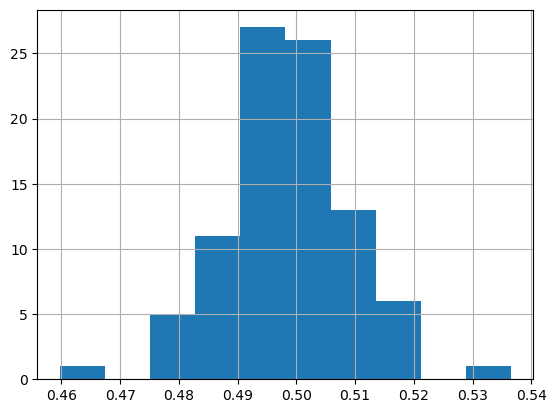

In [20]:
df_comb["single_label_acc"].hist()

In [37]:
convert(results_dict["label_pred"], "label")

{'single_label_acc': 0.5130444629227122,
 'label_0,1_CXP_acc': 0.7131782945736435,
 'label_0,1_CXP_len': 3868,
 'label_0,1_MIMIC_acc': 0.7036082474226805,
 'label_0,1_MIMIC_len': 1936,
 'label_0,1_NIH_acc': 0.7003891050583657,
 'label_0,1_NIH_len': 1282,
 'label_0,1_PAD_acc': 0.8,
 'label_0,1_PAD_len': 98}

In [7]:
df_comb.to_csv("1a_baseline_EVAL.csv", index=False)

In [21]:
df_comb.to_csv("1a_baseline_EVAL_coef.csv", index=False)